### Поиск дубликатов

In [1]:
def dubl_finder (data):
    """_Искатель дубликатов_

    Args:
        data (_pandas.core.frame.DataFrame_): _Датасет_
        
    Returns:
        _int_: _Число найденных дублей_
    """
    dubl_columns = list(data.columns)
    mask = data.duplicated(subset=dubl_columns)
    data_dublicates = data[mask]
    return(f'Число найденных дубликатов: {data_dublicates.shape[0]}')

### Поиск пропусков

In [2]:
def null_finder (data):
    """_Искатель пропусков_

    Args:
        data (_pandas.core.frame.DataFrame_): _Датасет_

    Returns:
        _pandas.core.series.Series_: _столбцы с null и доля null в процентах_
    """
    cols_null_percent = data.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
    return cols_with_null

In [ ]:
def plots(data, column_name):
    """
    Функция для построения гистограммы и коробчадой диагррамы
    для визуализации выбросов

    :data: Исходный датафрейм
    :column_name: Имя признака для анализа
    :return: Выводит график
    """

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # (18, 8)
    histplot = sns.histplot(data=data, x=column_name, ax=axes[0]) 
    boxplot = sns.boxplot(data=data, x=column_name, ax=axes[1]) 
    histplot.set_title(f'{column_name} Histogram') 
    boxplot.set_title(f'{column_name} Boxplot') 
    
    plt.tight_layout()
    plt.show()

In [1]:
def corr_bars(data, target):
    """_Функция для построения графика корреляции признаков_

    Args:
        data : Исходный датасет
        target (_type_): Целевой признак
    """
    import matplotlib.pyplot as plt #для визуализации
    import seaborn as sns #для визуализации
    %matplotlib inline
    plt.style.use('seaborn') #установка стиля matplotlib
    corr_with_target = data.corr()[target].abs().sort_values()
    corr_with_target = corr_with_target.drop(target)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(corr_with_target.index, corr_with_target.values)
    ax.set_title('Correlations with target') #название графика
    ax.set_xlabel(target) #название оси x
    ax.set_ylabel('Сorrelation coefficient'); #название оси y

In [ ]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

In [ ]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

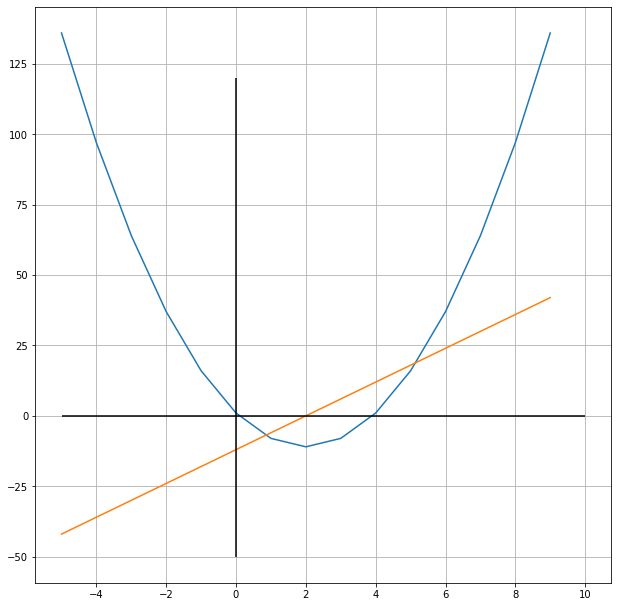

In [45]:
import matplotlib.pyplot as plt

x = []
y = []
y_1 = []

for i in range(-5,10):
    x.append(i)
    y.append(3*i*i-12*i+1)
    y_1.append(6*i-12)

fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.grid()
axes.plot(x,y)
axes.plot(x,y_1)
axes.vlines(0,-50,120, color='black')
axes.hlines(0,-5,10, color='black')

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16184\3966675112.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  y.append((i**3)/(i**2-1) )
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16184\3966675112.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  y_1.append((3*i**2)/(i**2-1) - (2*i**4)/(i**2-1)**2)
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16184\3966675112.py:20: RuntimeWarning: invalid value encountered in double_scalars
  y_1.append((3*i**2)/(i**2-1) - (2*i**4)/(i**2-1)**2)
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16184\3966675112.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  y_b.append((j**3)/(j**2-1) )
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16184\3966675112.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  y_1_b.append((3*j**2)/(j**2-1) - (2*j**4)/(j**2-1)**2)
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_16184\3966675112.py:24: RuntimeWarning: invalid v

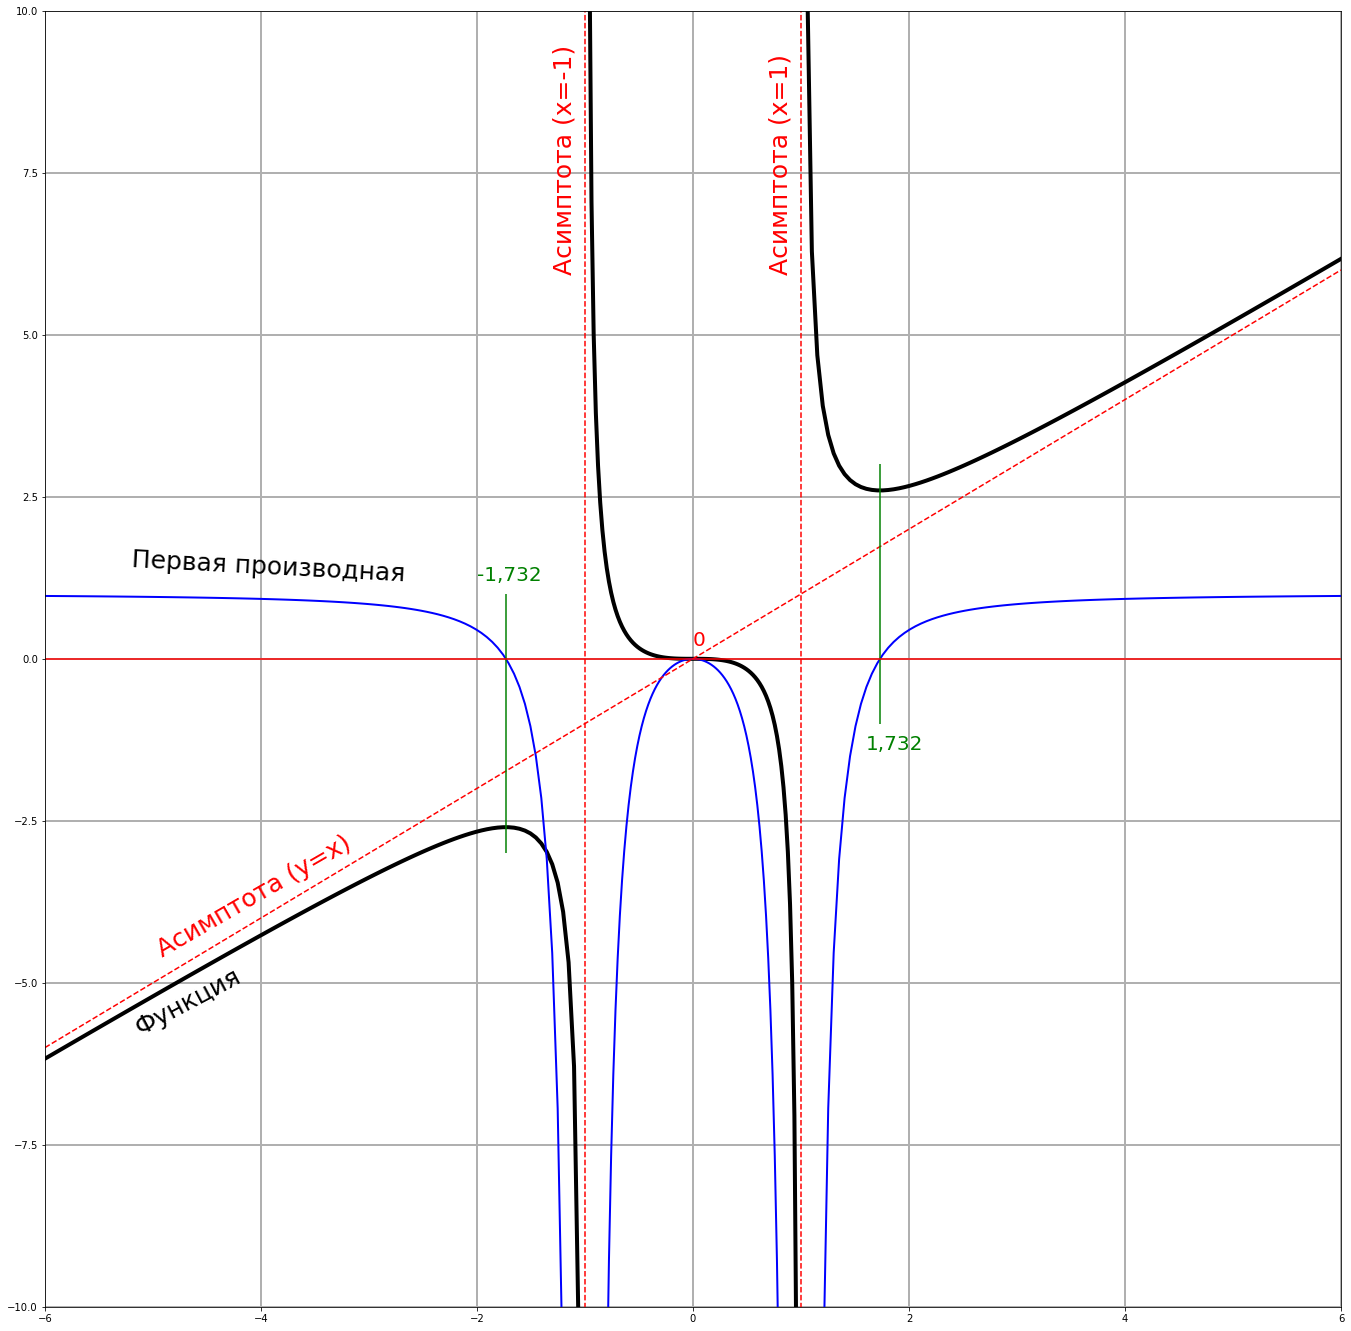

In [186]:
import matplotlib.pyplot as plt
import numpy as np
x = []
y = []
y_1 = []
x_b= []
y_b = []
y_1_b = []
x_c = []
y_c = []
y_1_c = []
a = np.linspace(-6,-1,100)
b = np.linspace(-1,1,100)
c = np.linspace(1,6,100)
area = a + b + c

for i in a:
    x.append(i)
    y.append((i**3)/(i**2-1) )
    y_1.append((3*i**2)/(i**2-1) - (2*i**4)/(i**2-1)**2)
for j in b:
    x_b.append(j)
    y_b.append((j**3)/(j**2-1) )
    y_1_b.append((3*j**2)/(j**2-1) - (2*j**4)/(j**2-1)**2)
for k in c:
    x_c.append(k)
    y_c.append((k**3)/(k**2-1) )
    y_1_c.append((3*k**2)/(k**2-1) - (2*k**4)/(k**2-1)**2)
fig = plt.figure(figsize=(18, 18))
axes = fig.add_axes([0.3,0.3,1,1])
axes.grid(which='major',linestyle='-', linewidth=2)
axes.plot(x,y, color='k', linewidth=4)
axes.plot(x_b,y_b, color='k', linewidth=4)
axes.plot(x_c,y_c, color='k', linewidth=4)
axes.plot(x,y_1, color='b', linewidth=2)
axes.plot(x_b,y_1_b, color='b', linewidth=2)
axes.plot(x_c,y_1_c, color='b', linewidth=2)
axes.plot([-6,6],[-6,6], color='r', linestyle='--')
axes.vlines(-1,20,-20, color='r', linestyle='--')
axes.vlines(1,20,-20, color='r', linestyle='--')
axes.vlines(-1.732,1,-3, color='g')
axes.vlines(1.732,3,-1, color='g')
axes.hlines(0,-6,6, color='r')
axes.set_ylim(-10,10)
axes.set_xlim(-6,6)
axes.text(-5.2, 1.2, 'Первая производная', rotation = -3, fontsize = 25)
axes.text(-5.2, -5.8, 'Функция', rotation = 28, fontsize = 25)
axes.text(-1.3, 6, 'Асимптота (x=-1)', rotation = 90, fontsize = 25, c='r')
axes.text(0.7, 6, 'Асимптота (x=1)', rotation = 90, fontsize = 25, c='r')
axes.text(-5, -4.6, 'Асимптота (y=x)', rotation = 30, fontsize = 25, c='r')
axes.text(-2, 1.2, '-1,732', rotation = 0, fontsize = 20, c='g')
axes.text(1.6, -1.4, '1,732', rotation = 0, fontsize = 20, c='g')
axes.text(0, 0.2, '0', rotation = 0, fontsize = 20, c='r')
plt.show()

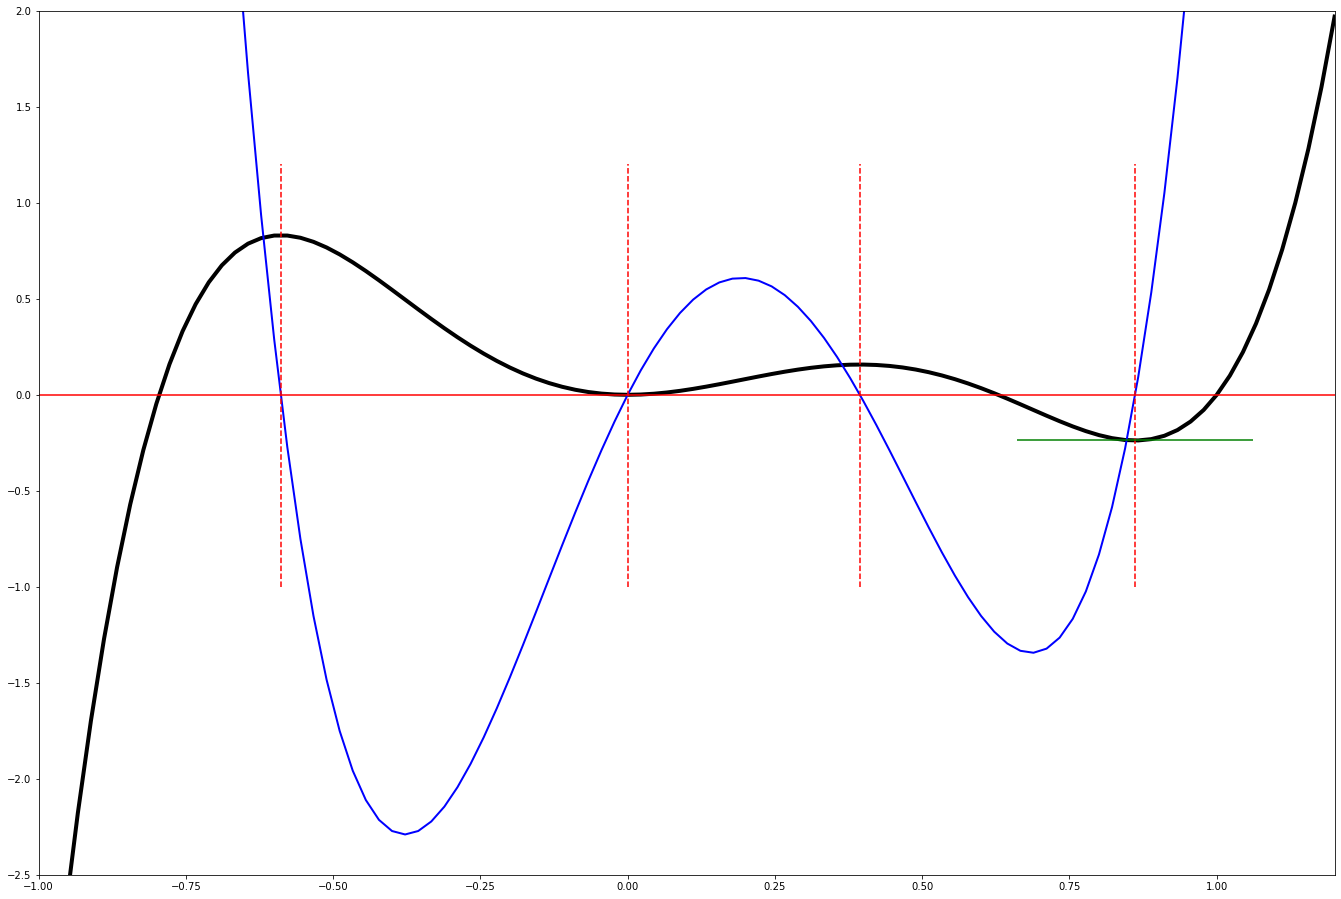

In [92]:
from sympy import Symbol, S, Eq, diff, solve, re #импортируем нужные функции для обозначения переменных
from sympy.calculus.util import function_range #импортируем функцию для поиска области значения
from sympy.calculus.util import continuous_domain #импортируем функцию для поиска области определения
import matplotlib.pyplot as plt
import numpy as np

x = Symbol("x") #определяем нашу переменную
f = 6*x**5 - 5*x**4 - 4*x**3 + 3*x**2 #определяем нашу функцию

area = np.linspace(-1,1.2,100)

x_plot = []
y_plot = []
y_prime_plot = []


for i in area:
    x_plot.append(i)
    y_plot.append(f.subs(x,i))
    y_prime_plot.append(f.diff().subs(x,i))

fig = plt.figure(figsize=(18, 12))
ax = fig.add_axes([0.3,0.3,1,1])
ax.plot(x_plot,y_plot, c='k', linewidth=4)
ax.plot(x_plot,y_prime_plot, c='b', linewidth=2)
ax.hlines(0,-1,1.2, color='r')
ax.set_ylim(-2.5,2)
ax.set_xlim(-1,1.2)

sol_df_1 = np.array(solve(f.diff()))
sol_df = []
fv_0 = None
fv_min = 10
x_min = 0
for k in range(len(sol_df_1)):
    res = float(round((re(sol_df_1[k])),3))
    sol_df.append(res)
    fv_0 = float(f.subs(x,res))
    if fv_0 < fv_min:
        fv_min = fv_0
        x_min = float(round((re(sol_df_1[k])),3))
    
ax.vlines(sol_df[0],-1,1.2, color='r', linestyle='--')
ax.vlines(sol_df[1],-1,1.2, color='r', linestyle='--')
ax.vlines(sol_df[2],-1,1.2, color='r', linestyle='--')
ax.vlines(sol_df[3],-1,1.2, color='r', linestyle='--')

ax.hlines(fv_min,x_min-0.2,x_min+0.2, color='g')


In [44]:
from sympy import Symbol, S, Eq, diff, solve #импортируем нужные функции для обозначения переменных
from sympy.calculus.util import function_range #импортируем функцию для поиска области значения
from sympy.calculus.util import continuous_domain #импортируем функцию для поиска области определения
import matplotlib.pyplot as plt
import numpy as np

x = Symbol("x") #определяем нашу переменную
f = 6*x**5 - 5*x**4 - 4*x**3 + 3*x**2 #определяем нашу функцию

area = np.linspace(-1,1.2,100)

x_plot = []
y_plot = []
y_prime_plot = []

sol_df = np.array(solve(f.diff()))


2/9 - (65/54 + sqrt(7495)*I/50)**(1/3)/3 - 74/(135*(65/54 + sqrt(7495)*I/50)**(1/3))

In [ ]:


print(len(solve(Eq(f,0))))
df = f.diff(x)

a_0 = 0.5
a_1 = 0
a_new = 0
i = 0
while True:
    if i > 10:
        break
    elif round(a_0,7) == round(a_1,7):
        print('stop')
        break
    a_new = a_0 - (f.subs(x,a_0)/df.subs(x,a_0))
    a_1 = a_0
    i += 1
    a_0 = a_new
    
    print(f'x= {round(a_new, 3)}, a_0= {a_0}, a_1 {a_1}')



In [136]:
# Градиентный спуск v.1

def func(x):
    return ((x**2)-4*x-7)

def func1(x):
    return (2*x-4)

def grad(x_0, alpha, accuracy):
    i = 0
    x_cur = x_0
    acc = accuracy + 1
    while True:
        if abs(acc) < accuracy:
            break
        i += 1
        x_cur = x_0 - alpha * func1(x_0)
        acc = x_0-x_cur
        precision = len(str(int(1/accuracy)))
        print(f'iter={i}, x_0={round(x_0, precision)}, x_cur={round(x_cur, precision)}, y={round(func(x_cur), precision)}')
        x_0 = x_cur

grad(6, 0.2, 0.001)          

iter=1, x_0=6, x_cur=4.4, y=-5.24
iter=2, x_0=4.4, x_cur=3.44, y=-8.9264
iter=3, x_0=3.44, x_cur=2.864, y=-10.2535
iter=4, x_0=2.864, x_cur=2.5184, y=-10.7313
iter=5, x_0=2.5184, x_cur=2.311, y=-10.9033
iter=6, x_0=2.311, x_cur=2.1866, y=-10.9652
iter=7, x_0=2.1866, x_cur=2.112, y=-10.9875
iter=8, x_0=2.112, x_cur=2.0672, y=-10.9955
iter=9, x_0=2.0672, x_cur=2.0403, y=-10.9984
iter=10, x_0=2.0403, x_cur=2.0242, y=-10.9994
iter=11, x_0=2.0242, x_cur=2.0145, y=-10.9998
iter=12, x_0=2.0145, x_cur=2.0087, y=-10.9999
iter=13, x_0=2.0087, x_cur=2.0052, y=-11.0
iter=14, x_0=2.0052, x_cur=2.0031, y=-11.0
iter=15, x_0=2.0031, x_cur=2.0019, y=-11.0
iter=16, x_0=2.0019, x_cur=2.0011, y=-11.0


In [132]:
# Градиентный спуск v.1.1

def grad(f, x_0, alpha, accuracy):
    from sympy import Symbol, Eq, solve, diff
    x = Symbol('x')
    df = diff(f)  
    i = 0
    x_cur = x_0
    acc = accuracy + 1
    print(f'f={f}, df={df}')
    while True:
        if abs(acc) < accuracy:
            break
        elif i > 15:
            print('to many iterations!')
            break
        elif abs(f.subs(x, x_cur)) > 10000:
            print(f'y is too big!')
            break
        i += 1
        x_cur = x_0 - alpha * df.subs(x, x_0)
        acc = x_0-x_cur
        precision = len(str(int(1/accuracy)))
        print(f'iter={i}, x_0={round(x_0, precision)}, x_cur={round(x_cur, precision)}, y={round(f.subs(x, x_cur), precision)}')
        x_0 = x_cur

grad(((x**2)-4*x-7), 6, 0.2, 0.001)     

f=x**2 - 4*x - 7, df=2*x - 4
iter=1, x_0=6, x_cur=4.4000, y=-5.2400
iter=2, x_0=4.4000, x_cur=3.4400, y=-8.9264
iter=3, x_0=3.4400, x_cur=2.8640, y=-10.2535
iter=4, x_0=2.8640, x_cur=2.5184, y=-10.7313
iter=5, x_0=2.5184, x_cur=2.3110, y=-10.9033
iter=6, x_0=2.3110, x_cur=2.1866, y=-10.9652
iter=7, x_0=2.1866, x_cur=2.1120, y=-10.9875
iter=8, x_0=2.1120, x_cur=2.0672, y=-10.9955
iter=9, x_0=2.0672, x_cur=2.0403, y=-10.9984
iter=10, x_0=2.0403, x_cur=2.0242, y=-10.9994
iter=11, x_0=2.0242, x_cur=2.0145, y=-10.9998
iter=12, x_0=2.0145, x_cur=2.0087, y=-10.9999
iter=13, x_0=2.0087, x_cur=2.0052, y=-11.0000000000000
iter=14, x_0=2.0052, x_cur=2.0031, y=-11.0000000000000
iter=15, x_0=2.0031, x_cur=2.0019, y=-11.0000000000000
iter=16, x_0=2.0019, x_cur=2.0011, y=-11.0000000000000


In [135]:
# Градиентный спуск метод Ньютона

def grad(f, x_0, alpha, accuracy):
    from sympy import Symbol, Eq, solve, diff
    x = Symbol('x')
    df = diff(f)  
    i = 0
    x_cur = x_0
    acc = accuracy + 10
    print(f'f={f}, df={df}')
    while True:
        if abs(acc) < accuracy:
            break
        elif i > 10:
            print('to many iterations')
            break
        elif abs(f.subs(x, x_cur)) > 10000:
            print(f'y is too big!')
            break
        i += 1
        x_cur = x_0 - f.subs(x, x_0)/df.subs(x, x_0)
        acc = x_0-x_cur
        precision = len(str(int(1/accuracy)))
        print(f'iter={i}, x_0={round(x_0, precision)}, x_cur={round(x_cur, precision)}, y={round(f.subs(x, x_cur), precision)}')
        x_0 = x_cur

grad(((x**2)-4*x-7), 6, 0.01, 0.0001)         

f=x**2 - 4*x - 7, df=2*x - 4
iter=1, x_0=6, x_cur=5.37500, y=0.39062
iter=2, x_0=5.37500, x_cur=5.31713, y=0.00335
iter=3, x_0=5.31713, x_cur=5.31662, y=0.0
iter=4, x_0=5.31662, x_cur=5.31662, y=0.0
